# Part E
## Module 9 Lab- Web-based Data Visualization (D3)

### **Q1: Scatter Plots**

a. Creating Scatter Plots:

1.

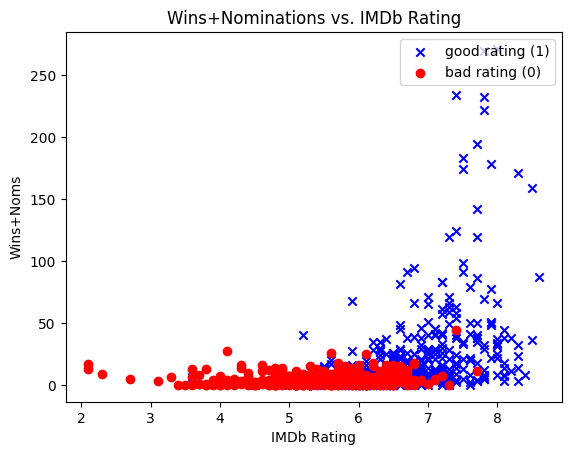

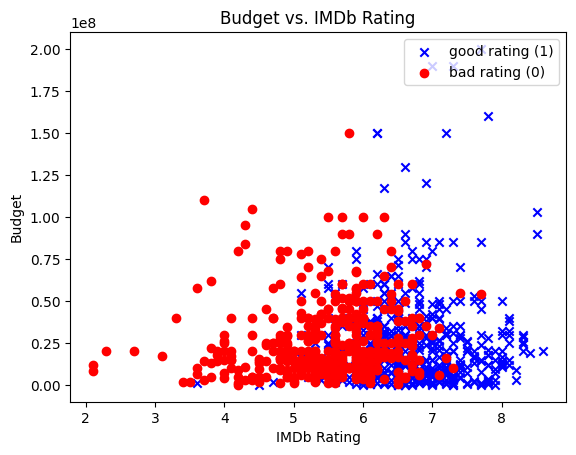

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. load data
df = pd.read_csv("movies.csv")

# 2. handle good and bad class
# split into good and bad classes
good = df[df["IsGoodRating"] == 1]
bad = df[df["IsGoodRating"] == 0]

### Plot 1: WinNoms vs IMDb Rating

# plot desired columns and classes
plt.figure()
# first plot the points belonging to the good class, using only the desired features
# assign good points to blue crosses
plt.scatter(
    good["imdbRating"],
    good["WinsNoms"],
    c = "blue",
    marker = "x",
    label = "good rating (1)"
)
# now plot the points belonging to the bad class. Assign to red circles
plt.scatter(
    bad["imdbRating"],
    bad["WinsNoms"],
    c = "red",
    marker = "o",
    label = "bad rating (0)"
)
plt.title("Wins+Nominations vs. IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Wins+Noms")
plt.legend(loc = "upper right")
plt.show()


### Plot 2: Budget vs. IMDb Rating
plt.figure()
plt.scatter(
    good["imdbRating"],
    good["Budget"],
    c = "blue",
    marker = "x",
    label = "good rating (1)"
)
plt.scatter(
    bad["imdbRating"],
    bad["Budget"],
    c = "red",
    marker = "o",
    label = "bad rating (0)"
)
plt.title("Budget vs. IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Budget")
plt.legend(loc = "upper right")
plt.show()



2. Wins+Nominations vs. IMDb Rating is the better feature combination for separating the classes. This is because movies with higher ratings will typically have more award nominations, creating a natural separation between movies of the good and bad rating classes. In the Budget vs. IMDb Rating, budget overlaps heavily with movies of both the good and bad classes and demonstrates a weak correlation between ratings and budget,

b. Scaling symbol sizes

0 271


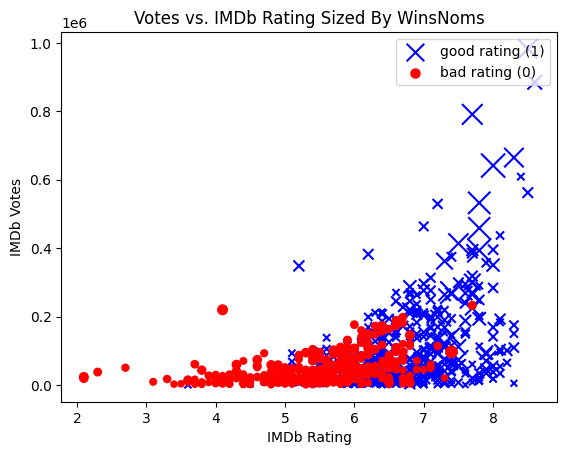

In [12]:
# 1. load data
df = pd.read_csv("movies.csv")

# use normalization to scale
print(df["WinsNoms"].min(), df["WinsNoms"].max()) # min 0, max 271
min_size = 20
max_size = 300
min_wins = 0
max_wins = 271
df["scaled_size"] = min_size + (df["WinsNoms"] - min_wins) * (max_size - min_size) / (max_wins - min_wins)

# 2. handle good and bad class
# split into good and bad classes AFTER scaled_size is added
good = df[df["IsGoodRating"] == 1]
bad = df[df["IsGoodRating"] == 0]

plt.figure()
plt.scatter(
    good["imdbRating"],
    good["imdbVotes"],
    s = good["scaled_size"],
    c = "blue",
    marker = "x",
    label = "good rating (1)"
)
plt.scatter(
    bad["imdbRating"],
    bad["imdbVotes"],
    s = bad["scaled_size"],
    c = "red",
    marker = "o",
    label = "bad rating (0)"
)

plt.title("Votes vs. IMDb Rating Sized By WinsNoms")
plt.xlabel("IMDb Rating")
plt.ylabel("IMDb Votes")
plt.legend(loc = "upper right")
plt.show()

c. Axis scales in D3 (but using matplotlib equivelants)

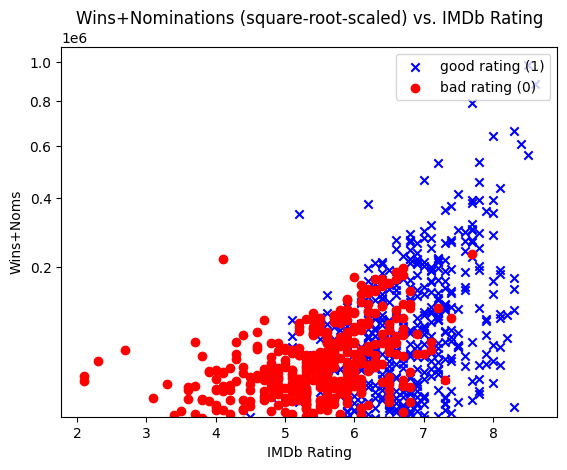

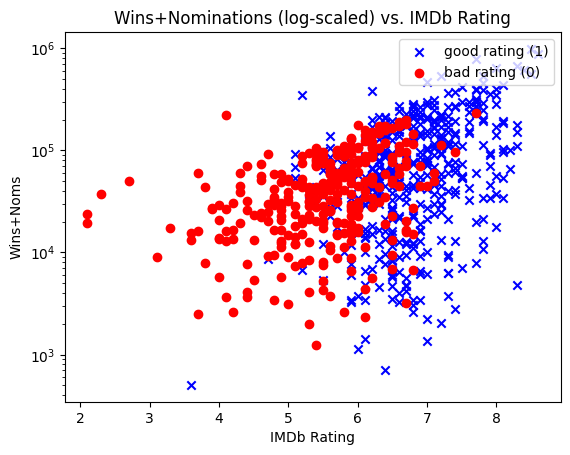

In [13]:
# 1. load data
df = pd.read_csv("movies.csv")

# 2. handle good and bad class
# split into good and bad classes AFTER scaled_size is added
good = df[df["IsGoodRating"] == 1]
bad = df[df["IsGoodRating"] == 0]

## first plot: using square root for y-axis
plt.figure()
plt.scatter(
    good["imdbRating"],
    good["imdbVotes"],
    c = "blue",
    marker = "x",
    label = "good rating (1)"
)
plt.scatter(
    bad["imdbRating"],
    bad["imdbVotes"],
    c = "red",
    marker = "o",
    label = "bad rating (0)"
)

# scale by custom sqr root function:
plt.yscale("function", functions=(lambda x: x**0.5, lambda x: x**2))

plt.title("Wins+Nominations (square-root-scaled) vs. IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Wins+Noms")
plt.legend(loc = "upper right")
plt.show()

## second plot:
df_safe = df[df["WinsNoms"] > 0]
# 2. handle good and bad class
# split into good and bad classes AFTER scaled_size is added
good = df_safe[df_safe["IsGoodRating"] == 1]
bad = df_safe[df_safe["IsGoodRating"] == 0]
plt.figure()
plt.scatter(
    good["imdbRating"],
    good["imdbVotes"],
    c = "blue",
    marker = "x",
    label = "good rating (1)"
)
plt.scatter(
    bad["imdbRating"],
    bad["imdbVotes"],
    c = "red",
    marker = "o",
    label = "bad rating (0)"
)

# scale by log function:
plt.yscale("log")

plt.title("Wins+Nominations (log-scaled) vs. IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Wins+Noms")
plt.legend(loc = "upper right")
plt.show()

We may want to use square root scale when data values vary moderately and include zeros, and we want to reduce the effect of very large values without diminishing smaller ones. We'd want to use log scale when values vary significantly and do not involve zeros, and we want to compress large values more aggressively.